In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from purify import purify_2d
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [2]:
covar = 0.5*np.ones((2, 2))
rho = 0.99
covar[0, 1] = rho
covar[1, 0] = rho

X = np.random.multivariate_normal(np.zeros((2, )),
                                 covar, size=(1000000, ))
X = np.clip(X, -1, 1)

n_bins = 16
hist, x_edges, y_edges = np.histogram2d(X[:, 0], X[:, 1], bins=(n_bins, n_bins))
#print(hist)
raw = np.zeros((n_bins, n_bins))
x_mids = []
y_mids = []
for i in range(n_bins):
    for j in range(n_bins):
        x_mid = (x_edges[i] + x_edges[i+1]) / 2
        x_mids.append(x_mid)
        y_mid = (y_edges[j] + y_edges[j+1]) / 2
        y_mids.append(y_mid)
        raw[i, j] = x_mid*y_mid
x_mids = np.array(x_mids)
y_mids = np.array(y_mids)

/Users/blengerich/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


In [3]:
intercept, m1, m2, mat, i = purify_2d(raw.copy(), hist)

/Users/blengerich/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


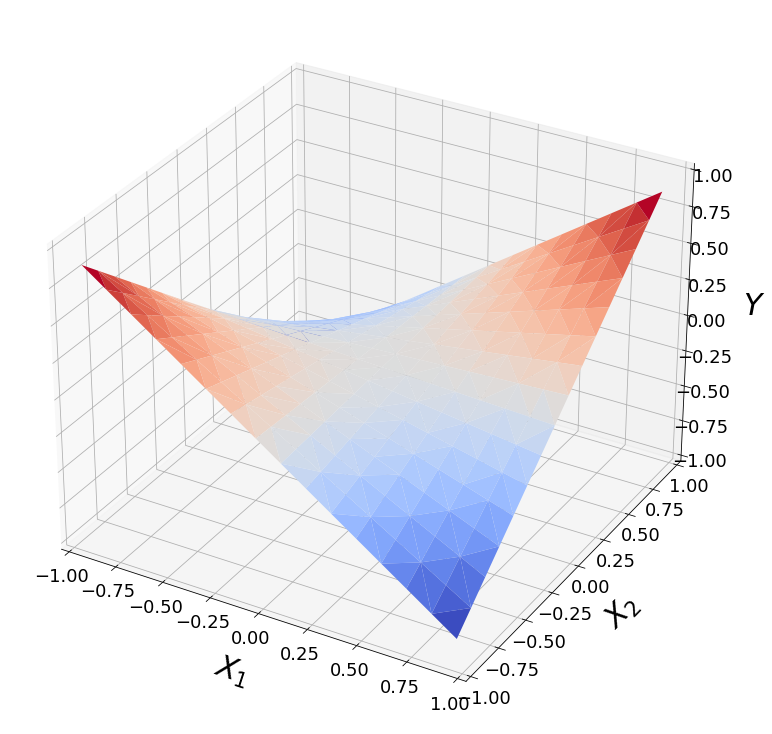

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
surf = ax.plot_trisurf(x_mids, y_mids, raw.flatten(), cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.set_zlim([-1, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
plt.setp(ax.get_xticklabels(), fontsize=18)
plt.setp(ax.get_yticklabels(), fontsize=18)
plt.setp(ax.get_zticklabels(), fontsize=18)
ax.set_xlabel('$X_1$', fontsize=30, labelpad=20)
ax.set_ylabel('$X_2$', fontsize=30, labelpad=20)
ax.set_zlabel('$Y$', fontsize=30, labelpad=20)
plt.savefig("results/intx_raw.pdf", dpi=300)

/Users/blengerich/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  
/Users/blengerich/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
/Users/blengerich/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecatio

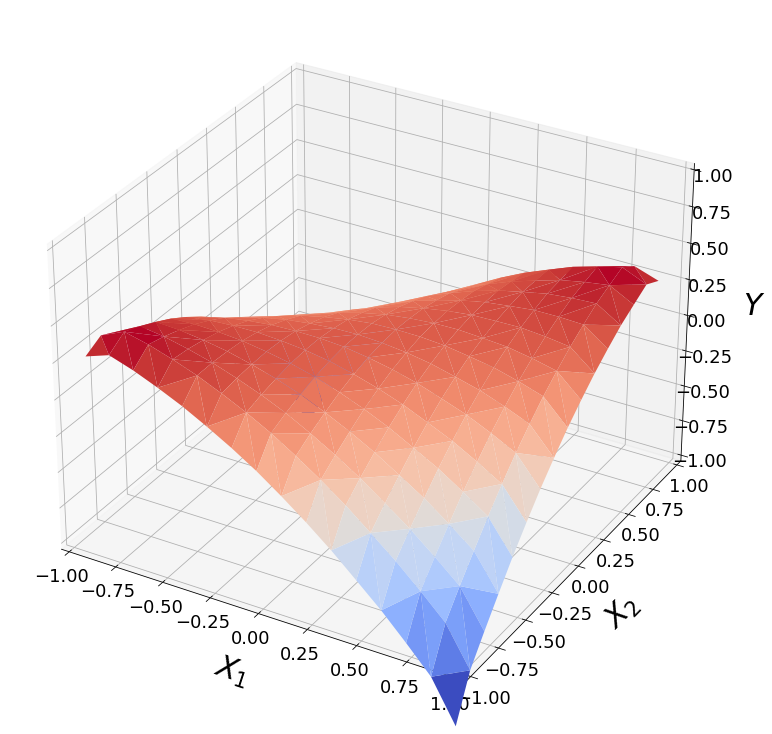

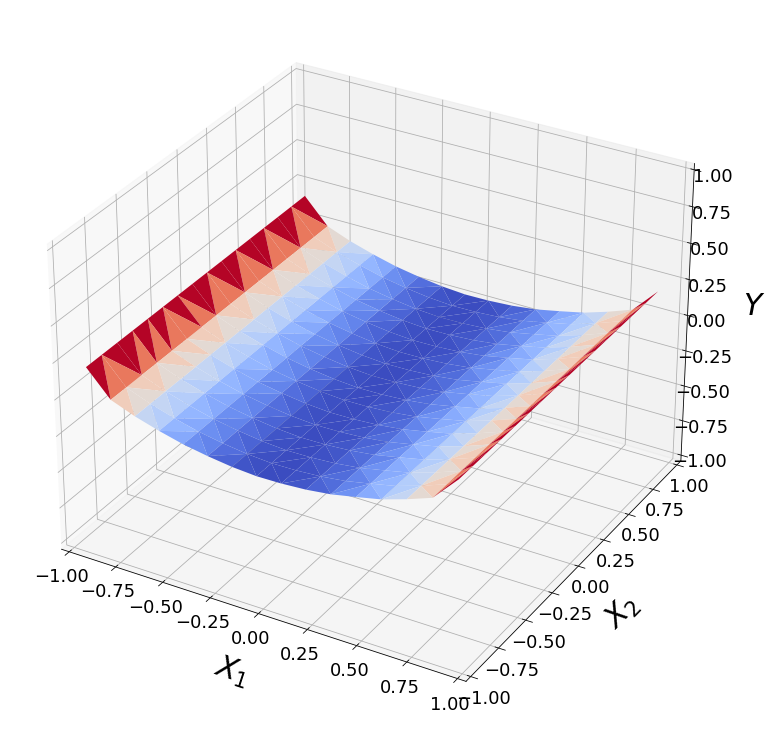

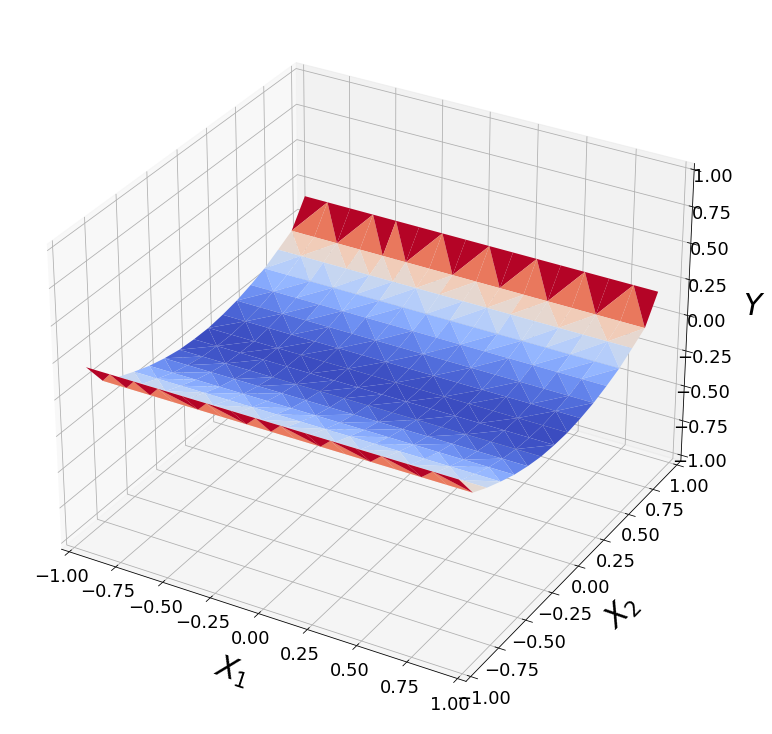

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
surf = ax.plot_trisurf(x_mids, y_mids, mat.flatten(), cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=True, alpha=1.0)
ax.set_zlim([-1, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
plt.setp(ax.get_xticklabels(), fontsize=18)
plt.setp(ax.get_yticklabels(), fontsize=18)
plt.setp(ax.get_zticklabels(), fontsize=18)
ax.set_xlabel('$X_1$', fontsize=30, labelpad=20)
ax.set_ylabel('$X_2$', fontsize=30, labelpad=20)
ax.set_zlabel('$Y$', fontsize=30, labelpad=20)
plt.savefig("results/intx_pure_1.pdf", dpi=300)


main1 = []
main2 = []
for i in range(n_bins):
    for j in range(n_bins):
        main1.append(m1[i])
        main2.append(m2[j])
main1 = np.array(main1)
main2 = np.array(main2)

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
surf = ax.plot_trisurf(x_mids, y_mids, main1.flatten(), cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=True, alpha=1.0)
ax.set_zlim([-1, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
plt.setp(ax.get_xticklabels(), fontsize=18)
plt.setp(ax.get_yticklabels(), fontsize=18)
plt.setp(ax.get_zticklabels(), fontsize=18)
ax.set_xlabel('$X_1$', fontsize=30, labelpad=20)
ax.set_ylabel('$X_2$', fontsize=30, labelpad=20)
ax.set_zlabel('$Y$', fontsize=30, labelpad=20)
plt.savefig("results/intx_pure_1_main1.pdf", dpi=300)

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
surf = ax.plot_trisurf(x_mids, y_mids, main2.flatten(), cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=True, alpha=1.0)
ax.set_zlim([-1, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
plt.setp(ax.get_xticklabels(), fontsize=18)
plt.setp(ax.get_yticklabels(), fontsize=18)
plt.setp(ax.get_zticklabels(), fontsize=18)
ax.set_xlabel('$X_1$', fontsize=30, labelpad=20)
ax.set_ylabel('$X_2$', fontsize=30, labelpad=20)
ax.set_zlabel('$Y$', fontsize=30, labelpad=20)
plt.savefig("results/intx_pure_1_main2.pdf", dpi=300)
